# Discrete Probability Distribution Transformations with Orthogonal Polynomials

Polynomials are sums of multiples of powers of free variables. We can define the single variable case like this:

$$ P(x) = \sum_{i=0}^{n} c_i x^i $$

Where $x$ is the **free variable** which can be **either continuous or discrete** and $c_i$ is a list of **coefficients** associated with each term.

In [1]:
#] add Polynomials
using Polynomials

In [2]:
c = [1, -3, 1, -3, 1]
Polynomial(c)

Polynomial(1 - 3*x + x^2 - 3*x^3 + x^4)

In [3]:
Polynomial(c).(1//1:5//1)

5-element Array{Rational{Int64},1}:
  -3//1
  -9//1
   1//1
  69//1
 261//1

## The Standard Basis

If we consider the set of powers $B=${$1,x,x^2,x^3,...$} as a **polynomial basis** and the coefficients, $c_i$, as **multiples of that basis** then similarities with vectors start to emerge. 

$$ P(x) = \sum_{i=0}^{n} c_i B_i(x) $$

In [4]:
B = [Polynomial(i==j ? 1//1 : 0//1 for j in 0:15) for i in 0:15]

P(B, c) = x -> sum(c[i]*B[i](x) for i in 1:length(c))

P(B, c).(1:5)

5-element Array{Rational{Int64},1}:
  -3//1
  -9//1
   1//1
  69//1
 261//1

We'll call this the **standard basis** but, as we'll see, there are better ones!


## Inner products

Analogously with vectors we can define **inner products** for pairs of polynomials.

$$ (P, Q) = \int_{a}^{b}P(x) Q(x) w(x) dx $$

Where the $(,)$ notation denotes the inner product between polynomials $P$ and $Q$. The **weight function**, $w(x)$, is chosen to ensure that the integral converges.

One simple case is to define the integral over a finite domain, say $-1..1$, and take the weight function as a constant, say $1$. This gives us 

$$ (P, Q) = \int_{-1}^{1}P(x) Q(x) dx $$

This choice of inner product leads to the [Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials). Given suitable weighting functions to ensure convergence, similar inner products over the half real line ($0, \infty$) and the full real line ($-\infty, \infty$) lead to the [Laguerre polynomials](https://en.wikipedia.org/wiki/Laguerre_polynomials) and the [Hermite polynomials](https://en.wikipedia.org/wiki/Hermite_polynomials) respectively.

# Discrete inner products

For the discrete case, rather than being a continuous free variable, $x$ takes values over a discrete domain, $D$. (Formally, the weight function is chosen to include a [Dirac delta](https://en.wikipedia.org/wiki/Dirac_delta_function) which is 0 at all points outside the domain). In this case the integral changes to a summation and it is customary to use $k$ as the free variable instead of $x$. 

$$ (P, Q) = \sum_{k \in D} P(k) Q(k) w(k)$$

Where D is the discrete domain.

This is particularly easy to define in code. For example where the domain of the polynomial is $0..N$ and defaulting to a constant weighting function we have:

In [5]:
N=9
inner(P,Q; w=k->1, D=0:N) = sum(P(k)*Q(k)*w(k) for k ∈ D)

inner(P(B, [-1,2,-3,4]), P(B, [-3,-4,0,1]))

3334683//1

## Orthogonality

Now we have an inner product for our polynomials we can extend the analogy with vectors to define **orthogonal polynomials** as having the following property with respect to some inner product:

$$ (P, Q) \begin{cases}
= 0 && \text{when P != Q} \\
\neq 0 && \text{otherwise}
\end{cases}
$$

Given this definition, it turns out that the standard basis $B=${$1,x,x^2,x^3,...$} is NOT orthogonal. This becomes obvious when we take the inner product between all pairs of basis polynomials, $B$. 

In [6]:
[inner(B[i], B[j]) for i in 1:N+1, j in 1:N+1]

10×10 Array{Rational{Int64},2}:
        10//1          45//1          285//1  …           574304985//1
        45//1         285//1         2025//1             4914341925//1
       285//1        2025//1        15333//1            42364319625//1
      2025//1       15333//1       120825//1           367428536133//1
     15333//1      120825//1       978405//1          3202860761145//1
    120825//1      978405//1      8080425//1  …      28037802953445//1
    978405//1     8080425//1     67731333//1        246324856379625//1
   8080425//1    67731333//1    574304985//1       2170706132009733//1
  67731333//1   574304985//1   4914341925//1      19179318935377305//1
 574304985//1  4914341925//1  42364319625//1     169842891165484965//1

This would result in a diagonal matrix if the polynomials were orthogonal. Notice also how the numbers grow very large, very quickly.

To find orthogonal polynomials, and continuing the analogy with vectors still further, we follow the [Gram–Schmidt process](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) to orthogonalise the standard basis $B = ${$1,x,x^2,...$} with respect to this specific inner product:

In [7]:
function gram_schmidt(v, inner)
    proj(u,v) = (inner(u,v)/inner(u,u))*u
    
    u = []
    push!(u, v[1])
    for k in 2:9
        push!(u, v[k] - sum([proj(u[j], v[k]) for j in 1:k-1]))
    end
    u
end

T = gram_schmidt(B, inner)

9-element Array{Any,1}:
 Polynomial(1//1)
 Polynomial(-9//2 + x)
 Polynomial(12//1 - 9//1*x + x^2)
 Polynomial(-126//5 + 461//10*x - 27//2*x^2 + x^3)
 Polynomial(216//5 - 180//1*x + 101//1*x^2 - 18//1*x^3 + x^4)
 Polynomial(-60//1 + 1822//3*x - 1125//2*x^2 + 530//3*x^3 - 45//2*x^4 + x^5)
 Polynomial(720//11 - 21348//11*x + 29264//11*x^2 - 13995//11*x^3 + 3005//11*x^4 - 27//1*x^5 + x^6)
 Polynomial(-7560//143 + 908394//143*x - 1665468//143*x^2 + 2194759//286*x^3 - 62685//26*x^4 + 10157//26*x^5 - 63//2*x^6 + x^7)
 Polynomial(4032//143 - 16030944//715*x + 35920772//715*x^2 - 547344//13*x^3 + 229425//13*x^4 - 20412//5*x^5 + 2646//5*x^6 - 36//1*x^7 + x^8)

Let's look again at their inner products as a matrix.

In [8]:
[inner(T[i], T[j]) for i in 1:N, j in 1:N]

9×9 Array{Rational{Int64},2}:
 10//1    0//1    0//1      0//1      0//1  …          0//1            0//1
  0//1  165//2    0//1      0//1      0//1             0//1            0//1
  0//1    0//1  528//1      0//1      0//1             0//1            0//1
  0//1    0//1    0//1  15444//5      0//1             0//1            0//1
  0//1    0//1    0//1      0//1  82368//5             0//1            0//1
  0//1    0//1    0//1      0//1      0//1  …          0//1            0//1
  0//1    0//1    0//1      0//1      0//1             0//1            0//1
  0//1    0//1    0//1      0//1      0//1     143942400//143          0//1
  0//1    0//1    0//1      0//1      0//1             0//1    325140480//143

All off-diagonal, that is $i\neq j$, are $0$ as required. Diagonal entries are non-zero. 

(Note also that even after orthoganalisation the numbers in the diagonal are still very large. Care must be taken to avoid the resulting numerical instability in real computations.)

When properly canonicalised, these are known as the [Discrete Chebyshev](https://en.wikipedia.org/wiki/Discrete_Chebyshev_polynomials) (or Gram) polynomials. When different inner product rules are chosen, different orthogonal polynomials emerge. See [Appendix I](#Appendix-I---Kravchuk-Polynomials) for an example. Optionally, we could also normalise the polynomials and get an **orthonormal** set but we don't do that here.

So what do these things actually look like? (Note that the plot is truncated to focus on the first $N$ values.) 

In [9]:
using Plots
gr()
default(size=(350,250), leg=:none)

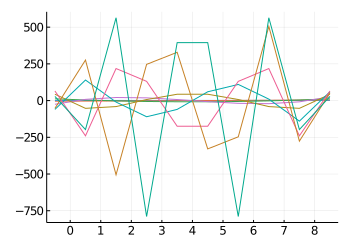

In [10]:
p = plot(0:N, x->T[1](x), xticks = (0:N) .+ 0.5, xformatter=x->floor(Int, x))
for i in 2:N
  plot!(0:N, x->T[i](x))
end
p

## Orthogonal expansion

We can now expand any function we want, say $Q$, as a sum of orthogonal components, $O$, such that:

$$ Q(x) = \sum_{i=0}^{\infty} d_i O_i(x) $$

Where the coefficients, $d_i$, represents the weight of the contribution from polynomial $O_i$. We find them by taking the inner product with each component in turn such that:

$$ (O_j, Q) = \sum_{x=0}^{N} O_j(x) Q(x) = \sum_{x=0}^{N} O_j(x) \sum_{i=0}^{\infty} d_i O_i(x) = \sum_{i=0}^{\infty} d_i \sum_{x=0}^{N} O_j(x) O_i(x) = \sum_{i=0}^{\infty} d_i \delta_{ij} = d_j $$

We must also make sure that since the polynomials are generally not orthonormal the sums must be properly normalised. For polynomials of finite degree this summation will always terminate. For more general functions in practice we choose a value, $n$, after which to truncate the sum. The higher the value of $n$ the better the approximation.

In [11]:
Q = Polynomial(rand(Int8, 5))

Polynomial(-100 + 3*x - 7*x^2 + 36*x^3 - 97*x^4)

In [12]:
d = [inner(T[j], Q)/inner(T[j], T[j]) for j in 1:N]

9-element Array{Rational{Int64},1}:
 -1417261//10
   -58281//1
   -13295//1
    -1710//1
      -97//1
        0//1
        0//1
        0//1
        0//1

The coefficients, $d_i$, form a spectrum in the transformed polynomial space in very much the same way that the Fourier transform forms a spectrum in the frequency space. Notice that they are zero for all values higher than the degree of $Q$. This is to be expected because *all* polynomials are orthogonal to those of lower degree.

In [13]:
R = sum(d[i] * T[i] for i in 1:N)

Polynomial(-100//1 + 3//1*x - 7//1*x^2 + 36//1*x^3 - 97//1*x^4)

In [14]:
@assert Q == R

# Distributions

## An unbiased distribution

If we roll a die and count the number of times we get each number, if the die is unbiased, then we'll get a discrete uniform distribution.

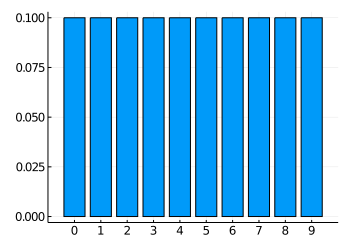

In [15]:
using Distributions

unbiased_distribution = DiscreteUniform(0,N)

plot1 = bar(0:N, x -> pdf(unbiased_distribution, x), xticks=0:N)

## A biased distribution

The die may be biased in such a way that certain values never appear and others values appear more frequently.

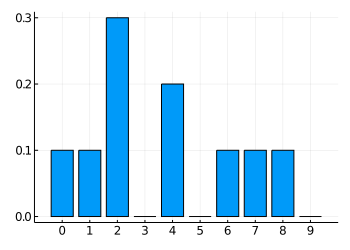

In [16]:
xs = collect(0:N)
ps = [0.1,0.1,0.3,0.0,0.2,0.0,0.1,0.1,0.1,0.0]
biased_distribution = DiscreteNonParametric(xs, ps)

bar(0:N, x -> pdf(biased_distribution, x), xticks=0:N)

## Transforming distributions

What if we want to generate one distribution from the another? 

Aha! This is where orthogonal polynomials come in. Just like expanding functions in terms of polynomial bases, we can also expand random variables, say X, in terms of orthogonal bases of another random variable, say $\zeta$, such that $ \phi: \zeta \rightarrow X $. Written as an orthogonal expansion:

$$ X = \sum_{i=0}^{\infty}{a_i O_i(\zeta)} $$

Where $O_i(\zeta)$ represents an orthogonal polynomial family as we have seen above. We just have to choose an appropriate family and calculate the coefficients, $a_i$.

In order to calculate the $a_i$s, one trick is to perform use the inverse of their CDFs, essentially transforming both distributions to a new, common uniform random variable, $u$, with domain $0..1$.

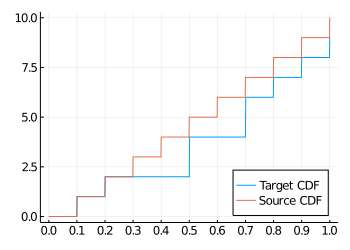

In [17]:
inv_cdf(dist) = u -> quantile(dist, u)

h = inv_cdf(biased_distribution)   # target
l = inv_cdf(unbiased_distribution) # source

plot(0.0:0.001:1.0, h, label="Target CDF", legend=:bottomright, xticks=0:0.1:1.0)
plot!(0.0:0.001:1.0, l, label="Source CDF")

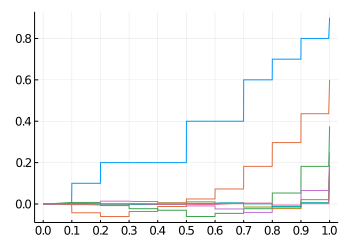

In [18]:
O = T # Choose the orthogonal polynomial family to expand with
n = N # The number of polynomials to use in the truncated sum

integrand(i) = u -> h(u)*O[i](l(u))
sp = [inner(O[i], O[i]) for i in 1:n]

plot([x -> integrand(i)(x)/sp[i] for i in 1:n-2], xticks=0.0:0.1:1.0)

In [19]:
Δx=0.00001
a = [sum(integrand(i)(x) for x in Δx:Δx:1.0)*Δx*(N+1)/sp[i] for i in 1:n]

9-element Array{Float64,1}:
  3.6000300000000003
  0.8606660606060607
  0.05307121212121213
  0.005076379176379177
 -0.0060995920745920765
  0.00027256410256410265
  0.00029563194444444445
 -0.00033628793183940246
  0.00040138516865079367

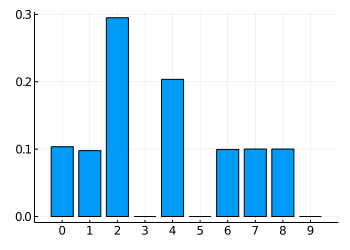

In [20]:
ζ = rand(unbiased_distribution, 10000)
X = sum(a[i] * O[i].(ζ) for i in 1:n)

histogram(X.+0.5, nbins=0:N+1, normed=true, bar_width=0.8, xticks = (0:N) .+ 0.5, xformatter=x->floor(Int, x))

## How good is the result?

We could inspect the moments of the data:

In [21]:
using StatsBase
mean(X), std(X), mean(biased_distribution), std(biased_distribution)

(3.601772009027147, 2.531791419622475, 3.6000000000000005, 2.5377155080899043)

A better way is to use a distance measure such as the [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) to compare the distributions directly.

In [22]:
sample_count = length(X)
P_kl = countmap(round.(Int, X))
Q_kl = countmap(rand(biased_distribution, sample_count))
sum(P_kl[i]*log(P_kl[i]/Q_kl[i])/sample_count for i in keys(P_kl))

0.0006355191604690974

Values close to $0$ indicate a very good agreement. 

# Observations and Limitations

The above shows how a transform between different domains may be carried out. However there are some important caveats:

1. The cardinality of the domain of the source distribution MUST be *at least* the size of the target distribution. Although the source values are random, the mapping itself is deterministic (the polynomials, $O_i$, are deterministic and the coefficients, $k_i$ are deterministic). Any particular value always maps to the same transformed value.

2. It's actually worse than that: the source distribution domain must be large enough to cover the entire domain of the inverse sample transform, including its smallest increment. In other words, to be able to generate any value $X_i$, the domain of the source distribution must have sufficient resolution to cover the smallest of all the values $\frac{1}{P(X_i)}$, which, in the general case, will be *arbitrarily small*.

This limitation makes it quite difficult to use in practice as it stands. One possible solution might be to take source values from a continuous uniform distribution and map them to the discrete domain. However my application has discrete source value so another way is needed. Next step would be to adapt the procedure to use a larger finite source domain to approximate another distribution to within a certain tolerance. 

# Appendix I - Kravchuk Polynomials

## The binomial distribution

You're in a queue at the supermarket. In any given minute you move forward 1 place with probability $p$. How many places will you have moved in N minutes?

Well, after one minute the probability of moving once will be $\Pr(1)=p$ and the probability of not moving will be $\Pr(0)=1-p$. In the second minute it will be $\Pr(0)=(1-p)^2$, $\Pr(1)=(2)\times p(1-p)$ and $\Pr(2)=p^2$, and so on. In general, after N minutes:

$$\Pr(k;N,p) = \binom{N}{k}\times p^k(1-p)^{N-k}$$

This is called the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution). Notice a couple of things. After N minutes the maximum number of places you can have moved is N. It is also possible, but ever more unlikely, they you won't have moved at all!

Let's simulate it with a given value of $p$.

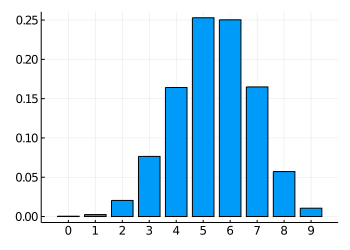

In [23]:
p = 0.6
samples = [sum(rand() < p for t in 1:N) for sample in 1:10000]
histogram(samples, nbins=0:N+1, normed=true, bar_width=0.8, xticks = (0:N) .+ 0.5, xformatter=x->floor(Int, x))

Interestingly, the weighting function used to define the inner product can be related to a probability density or mass function. The constant weighting would correspond to a [discrete uniform distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution). We can use alternatives as long as the support of the distribution matches the domain of the inner product. One such distribution is the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution).

$$ (P, Q) = \sum_{k=0}^{N} P(k) Q(k) {{N}\choose{k}}p^k(1-p)^{N-k}$$

In [24]:
p = 5//10
w = k -> binomial(N, k)*p^k*(1-p)^(N-k)

K = gram_schmidt(B, (P,Q) -> inner(P,Q;w))

9-element Array{Any,1}:
 Polynomial(1//1)
 Polynomial(-9//2 + x)
 Polynomial(18//1 - 9//1*x + x^2)
 Polynomial(-63//1 + 109//2*x - 27//2*x^2 + x^3)
 Polynomial(189//1 - 261//1*x + 110//1*x^2 - 18//1*x^3 + x^4)
 Polynomial(-945//2 + 2073//2*x - 675//1*x^2 + 185//1*x^3 - 45//2*x^4 + x^5)
 Polynomial(945//1 - 7011//2*x + 6773//2*x^2 - 1395//1*x^3 + 280//1*x^4 - 27//1*x^5 + x^6)
 Polynomial(-2835//2 + 42003//4*x - 58779//4*x^2 + 8554//1*x^3 - 2520//1*x^4 + 791//2*x^5 - 63//2*x^6 + x^7)
 Polynomial(2835//2 - 30267//1*x + 58848//1*x^2 - 45864//1*x^3 + 18424//1*x^4 - 4158//1*x^5 + 532//1*x^6 - 36//1*x^7 + x^8)

In [25]:
# Removing denominators
K ./= gcd.(coeffs.(K));

With suitable canonicalisation these become the [Kravchuk polynomials](https://en.wikipedia.org/wiki/Kravchuk_polynomials).